In [9]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from  sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler

In [6]:
df=pd.read_csv("./cluster-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
#we can remove name because it is unique
X=df.drop("name",axis=1)
X=pd.get_dummies(X,drop_first=True)
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [12]:
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(X)
scaler_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 1.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 1.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 1.        , 0.        ,
        1.        ]])

In [14]:
scaler_df=pd.DataFrame(data=scaler_data,columns=X.columns)
scaler_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0


<AxesSubplot:>

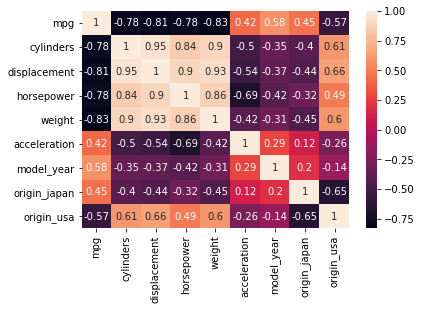

In [21]:
sbn.heatmap(scaler_df.corr(),annot=True)

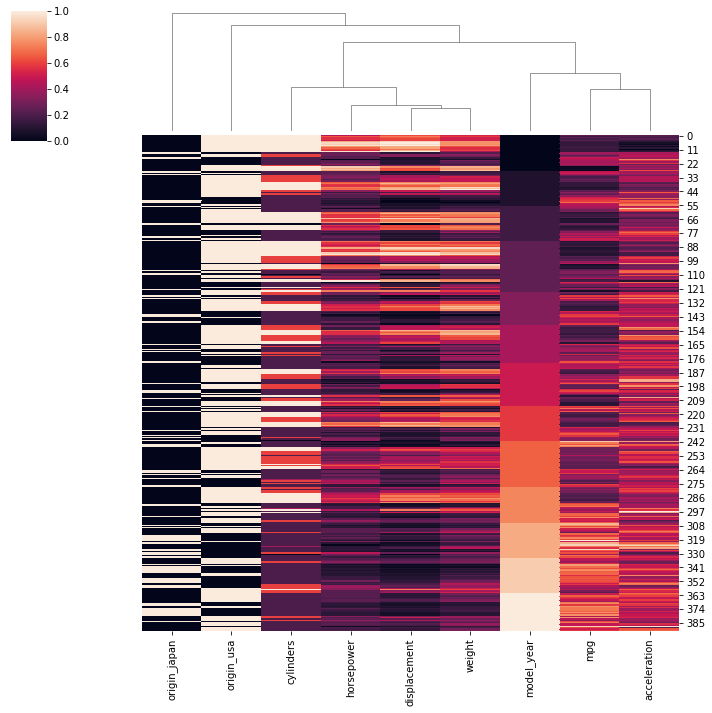

In [20]:
sbn.clustermap(scaler_df,row_cluster=False);

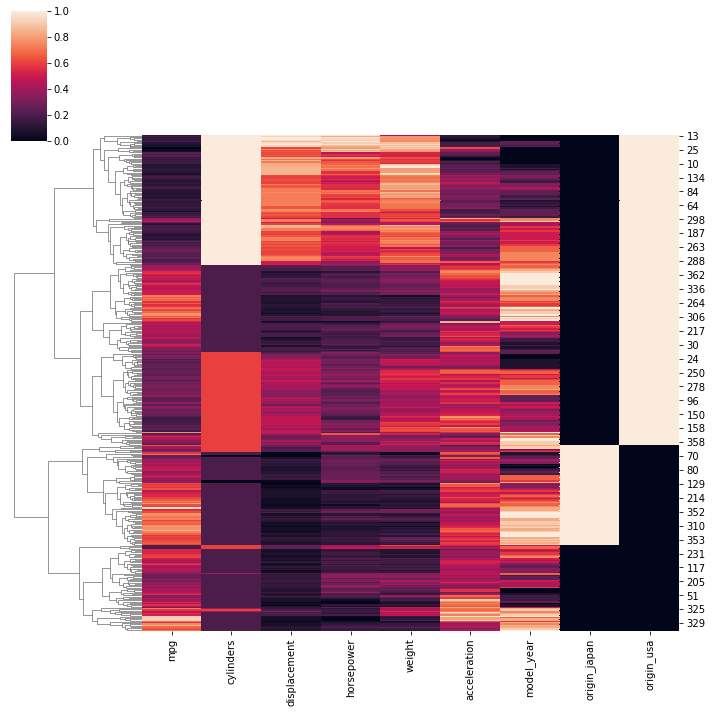

In [22]:
sbn.clustermap(scaler_df,col_cluster=False);